In [1]:
## https://pypi.org/project/autoscraper/ --> pip install autoscraper

In [3]:
from autoscraper import AutoScraper

In [3]:
url = 'https://indianexpress.com/article/cities/hyderabad/kcr-national-party-launch-8144928'

headings = url.split('/')[-1]
headings = headings.replace('-', ' ')
headings

'kcr national party launch 8144928'

In [4]:
##headings = 'kcr national party launch'

In [5]:
wanted_list = ['kcr national party launch']

In [6]:
scraper = AutoScraper()
result   = scraper.build(url, wanted_list)

In [7]:
print(result)

[]


In [8]:
url = "https://www.indiatoday.in/technology/features/story/iphone-14-or-iphone-13-which-one-should-you-buy-right-now-1998985-2022-09-11"

url.split('/')[-1]

'iphone-14-or-iphone-13-which-one-should-you-buy-right-now-1998985-2022-09-11'

In [9]:
url = "https://www.hindustantimes.com/cricket/pakistan-vs-sri-lanka-live-cricket-score-asia-cup-2022-final-pak-vs-sl-t20-match-today-dubai-international-stadium-101662895646911.html"
url.split('/')[-1]

'pakistan-vs-sri-lanka-live-cricket-score-asia-cup-2022-final-pak-vs-sl-t20-match-today-dubai-international-stadium-101662895646911.html'

In [13]:
from requests_html import HTMLSession

In [14]:
url = 'https://indianexpress.com/article/cities/hyderabad/kcr-national-party-launch-8144928'
session = HTMLSession()

r = session.get(url)
r.html.render(sleep=1, scrolldown=5)
article = r.html.find('article')

RuntimeError: Cannot use HTMLSession within an existing event loop. Use AsyncHTMLSession instead.

In [ ]:
#import what we need
from requests_html import HTMLSession
session = HTMLSession()

#use session to get the page
r = session.get('https://indianexpress.com/article/cities/hyderabad/kcr-national-party-launch-8144928/')

#render the html, sleep=1 to give it a second to finish before moving on. scrolldown= how many times to page down on the browser, to get more results. 5 was a good number here
##r.html.render(sleep=1, scrolldown=5)

#find all the articles by using inspect element and create blank list
articles = r.html.find('article')
newslist = []

In [ ]:
articles

In [ ]:
#loop through each article to find the title and link. try and except as repeated articles from other sources have different h tags.
for item in articles:
    try:
        newsitem = item.find('h3', first=True)
        title = newsitem.text
        link = newsitem.absolute_links
        newsarticle = {
            'title': title,
            'link': link 
        }
        newslist.append(newsarticle)
    except:
           pass

#print the length of the list
print(len(newslist))

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

In [ ]:
source = requests.get('http://coreyms.com').text
soup = BeautifulSoup(source, 'lxml')

In [ ]:
article = soup.find('div', class_='article')

In [ ]:
headline = article.h2.a.text
print(headline)

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
with open('simple.html') as html_file:
    soup = BeautifulSoup(html_file, 'lxml')

In [ ]:
print(soup)

In [ ]:
print(soup.prettify())

In [ ]:
soup.title

In [ ]:
soup.title.text

In [ ]:
soup.div ## By default, 1st div tag present

In [ ]:
soup.find('div', class_='footer')

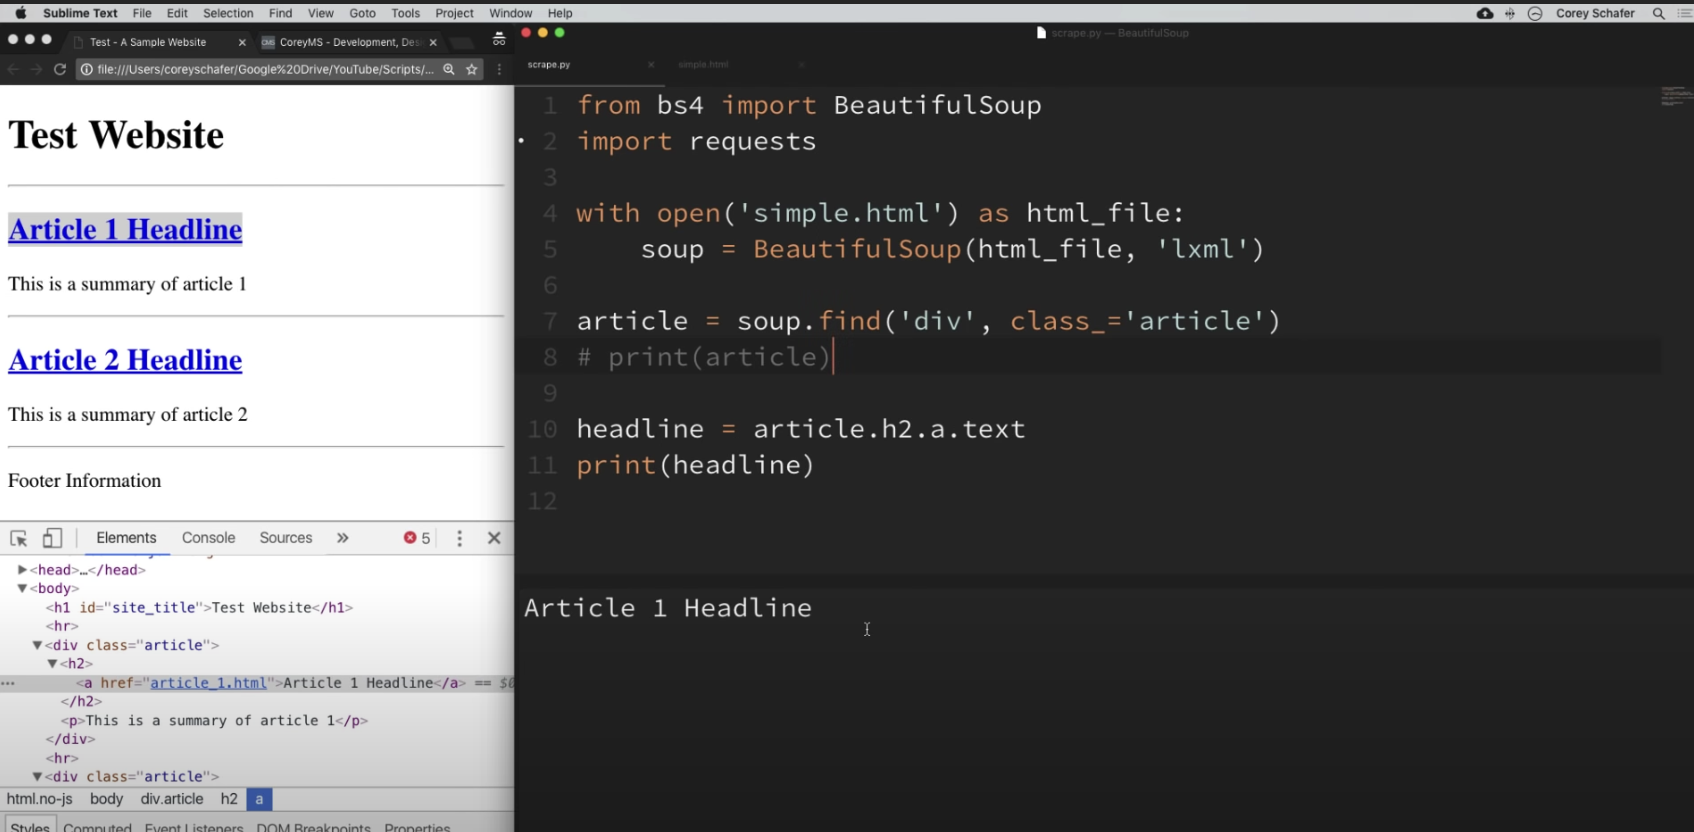

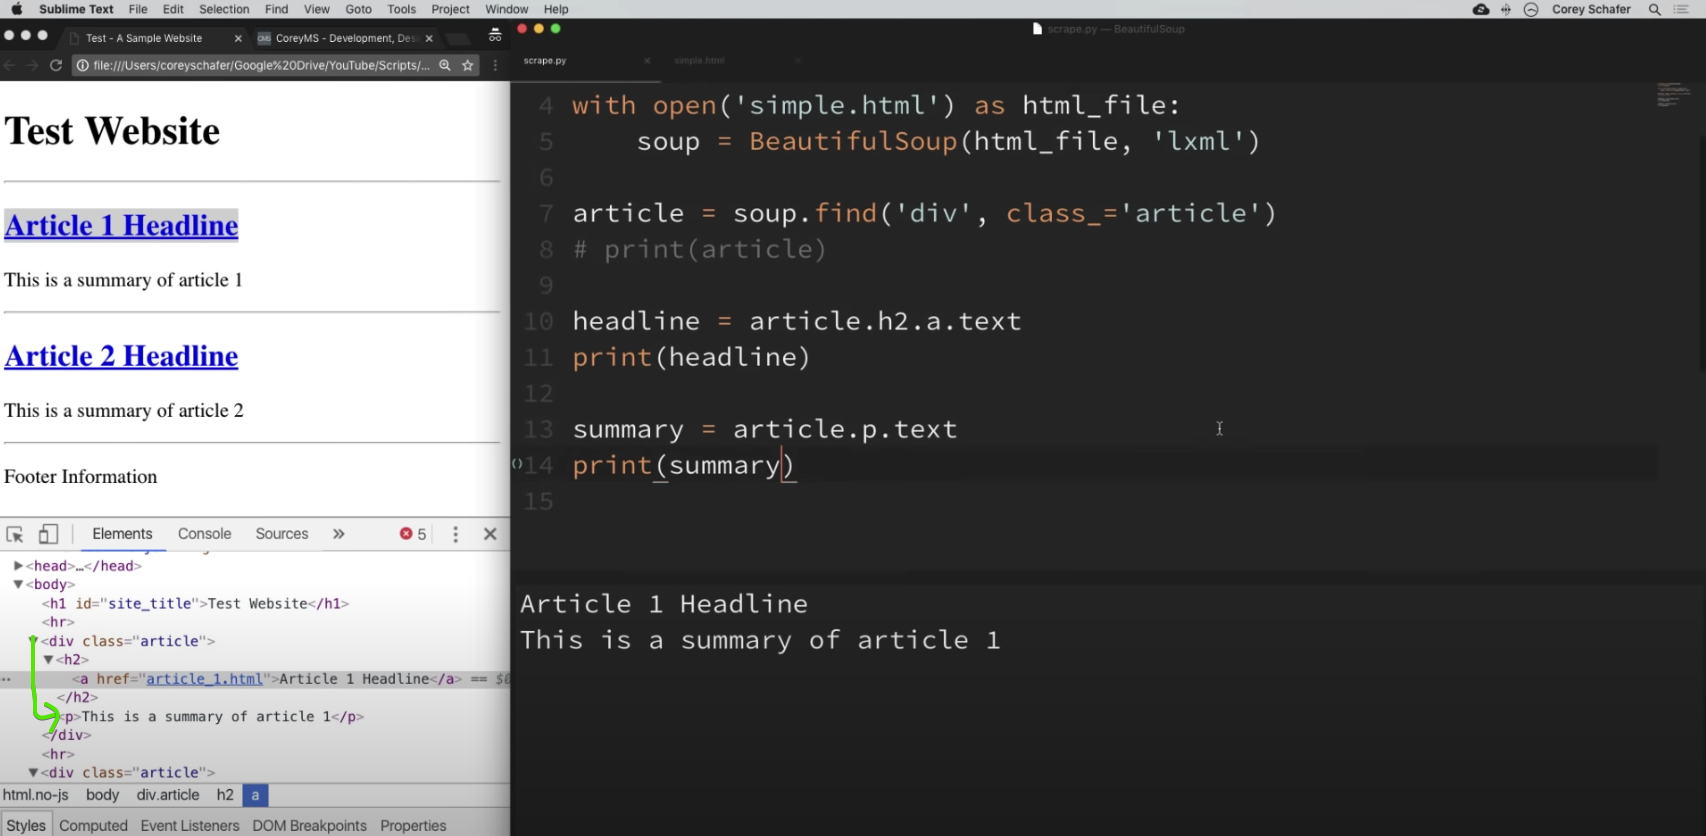

In [ ]:
this is only for 1 single article. Lets print the heading and summary of all the articles

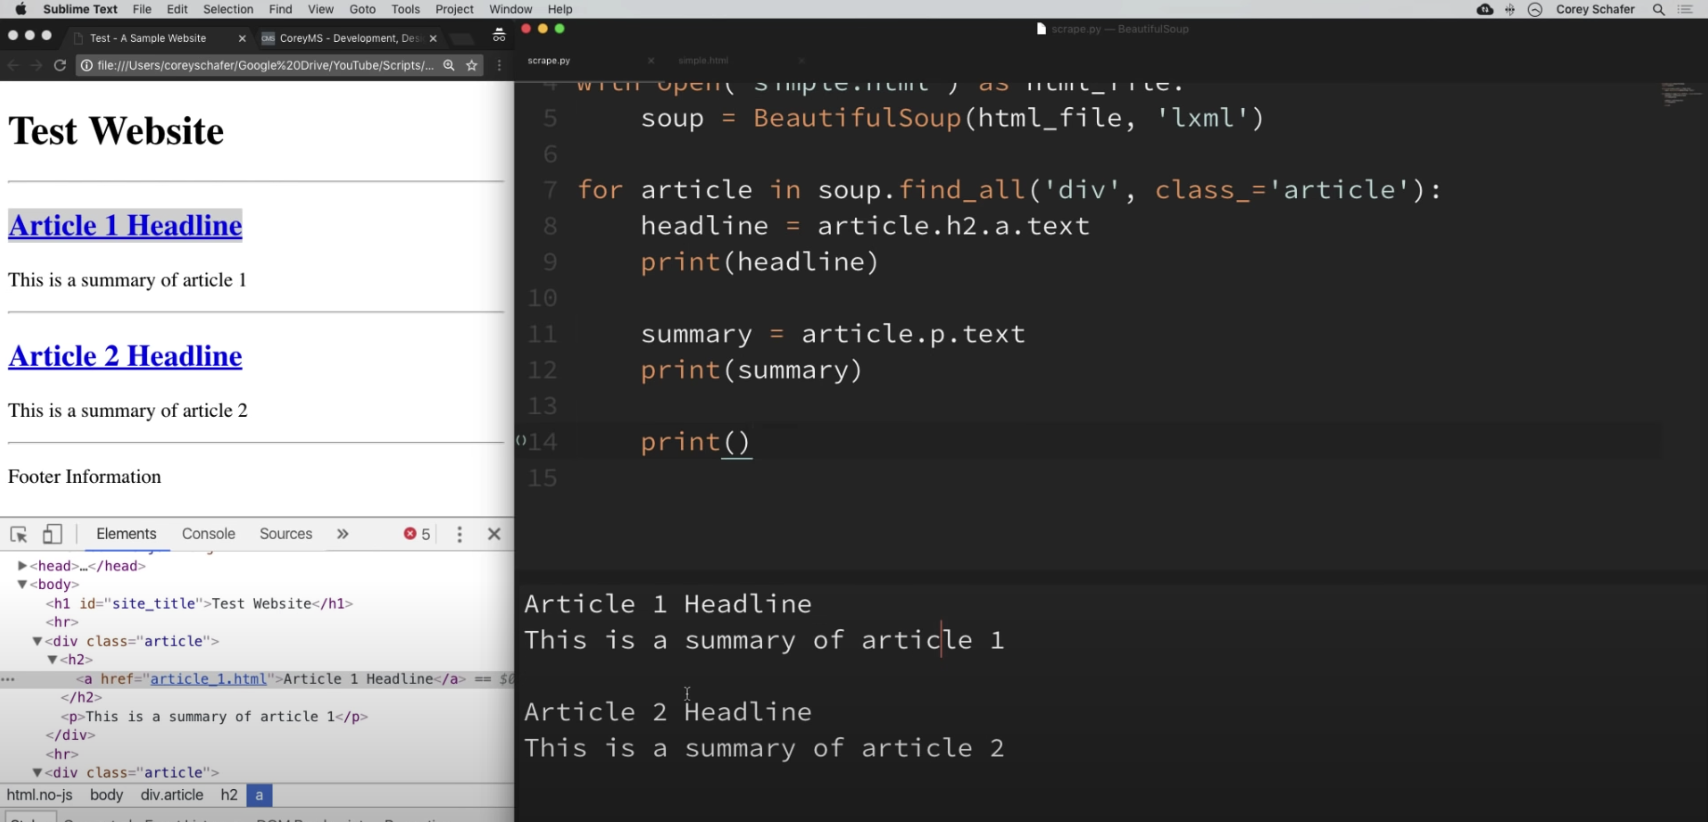

In [ ]:
https://coreyms.com/

In [ ]:
'''
There are more articles in this web-site. 
SO will split the page article-by-article.  (article)
'''

In [ ]:
'''
From article, --> title
              --> summary
              --> video link
'''

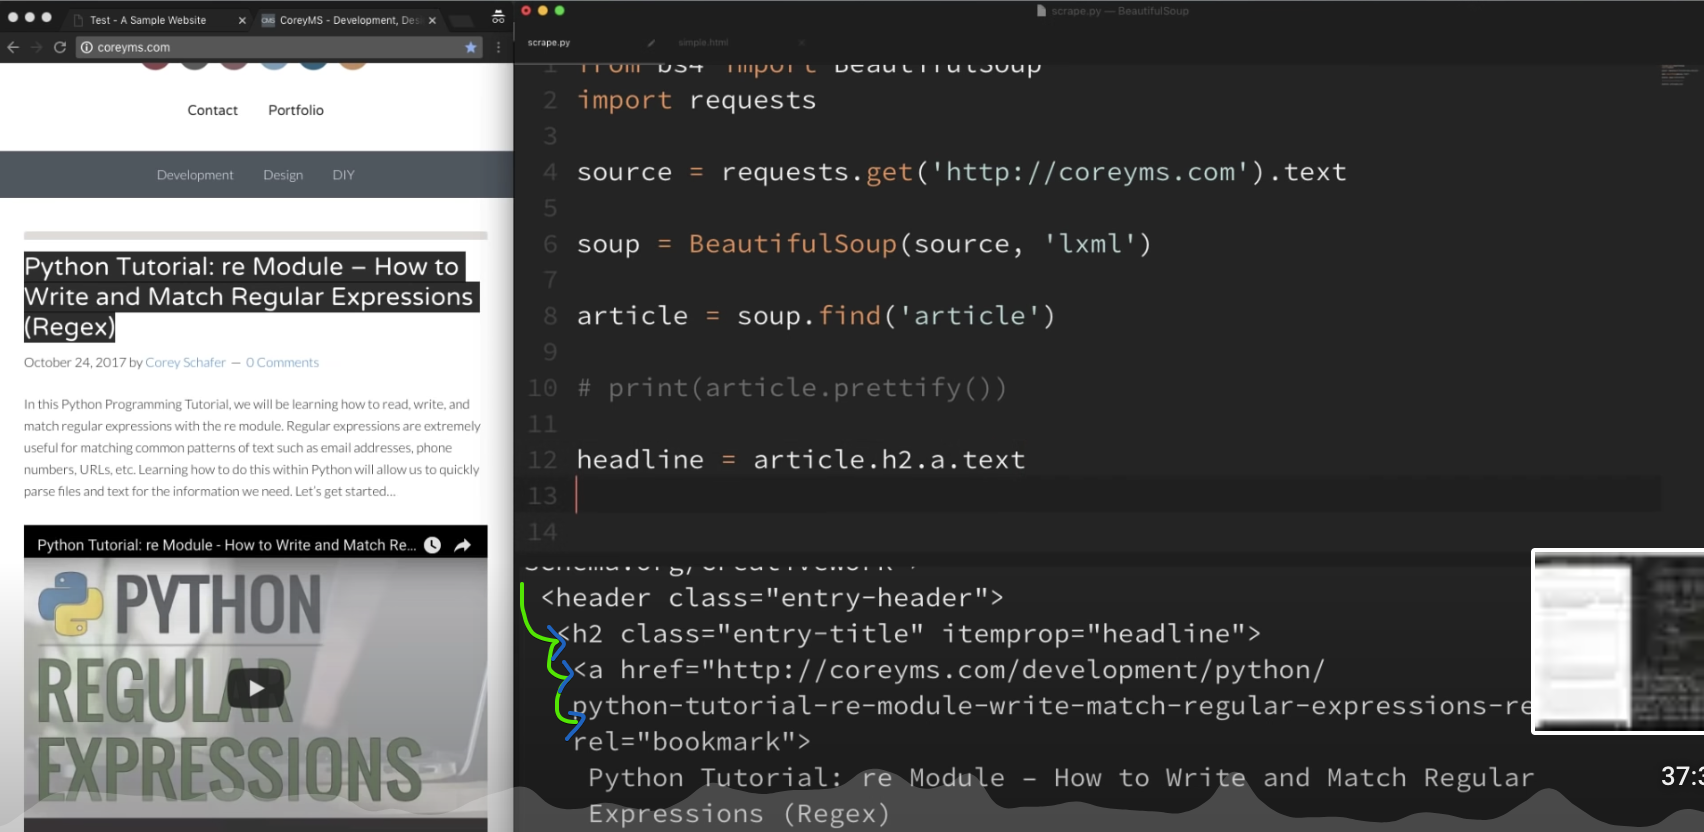

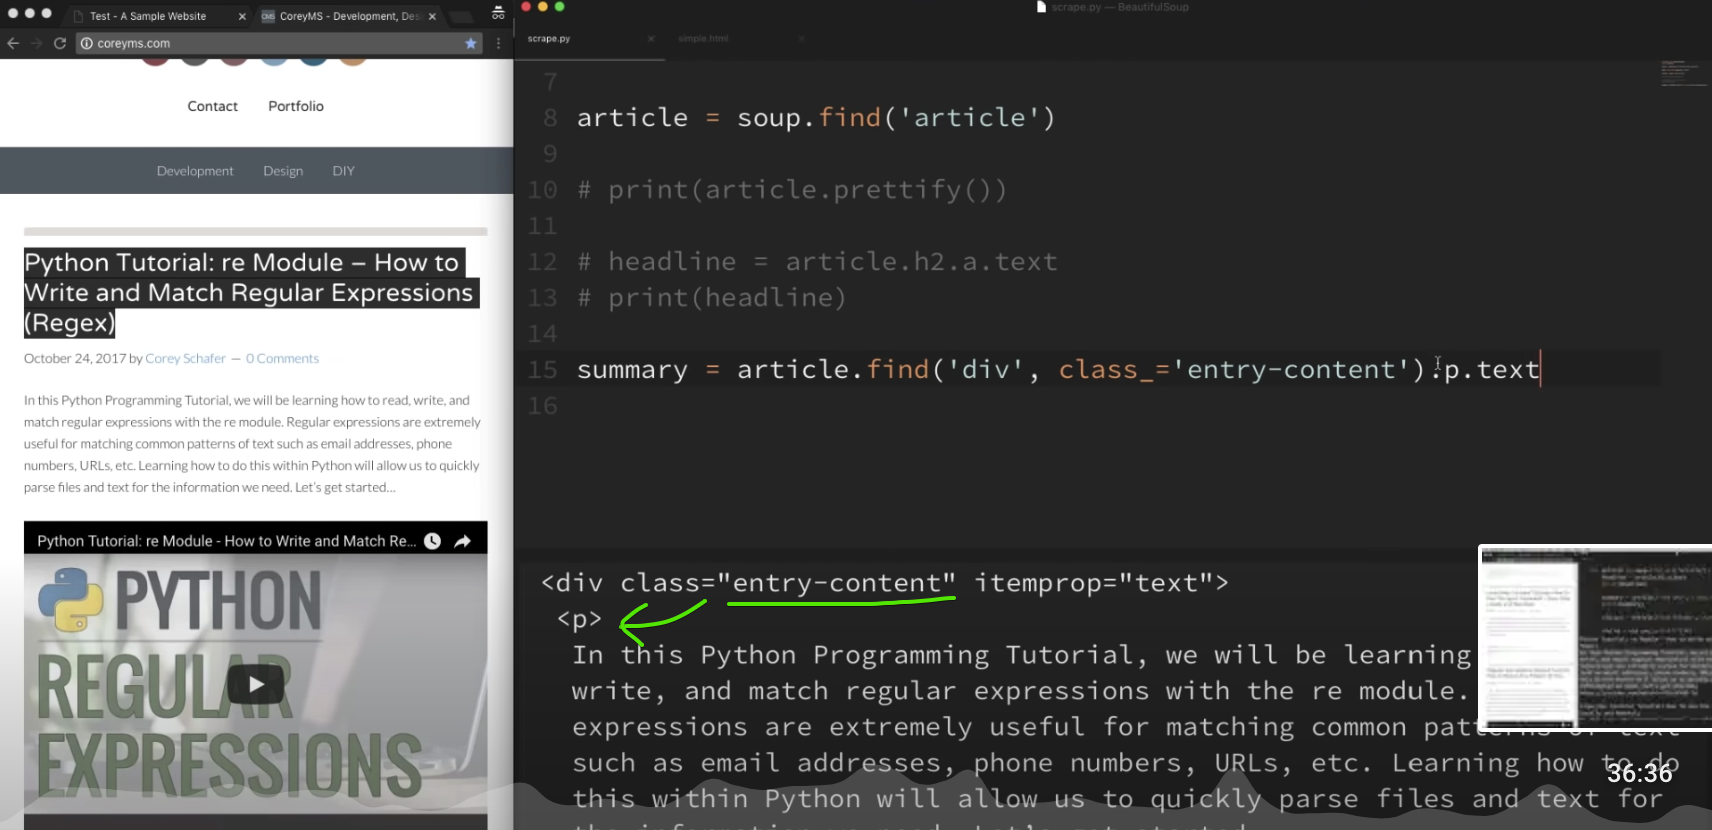

In [ ]:
Accessing the tag attributes

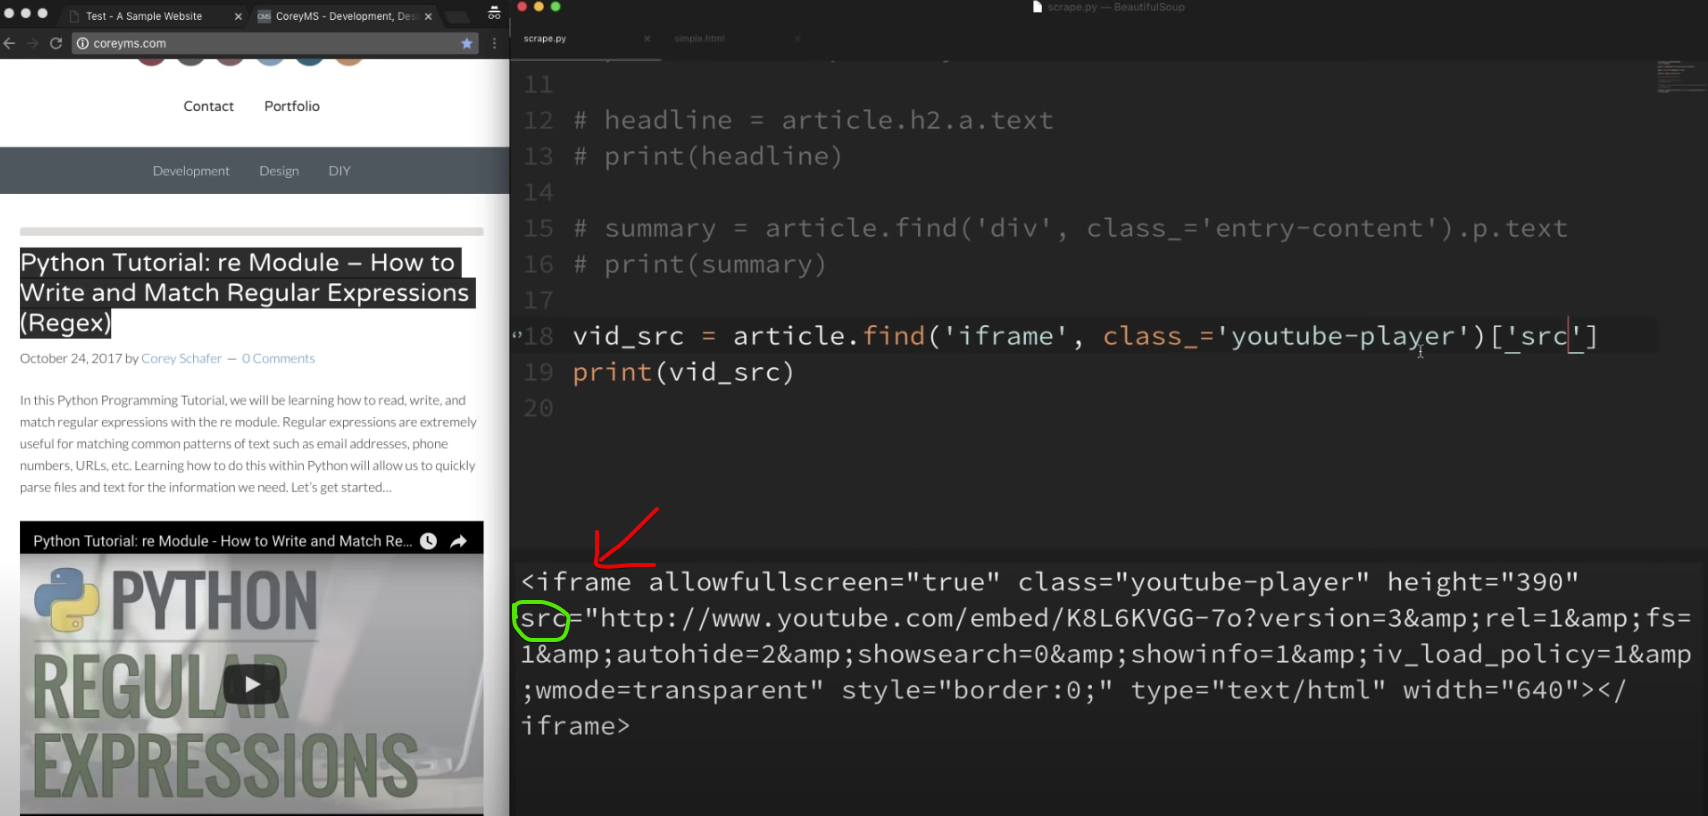

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv

In [ ]:
url = "https://indianexpress.com/article/india/diwali-pollution-air-quality-index-delhi-mumbai-kolkata-8228093/"

In [ ]:
source = requests.get(url).text
soup = BeautifulSoup(source, 'lxml')

In [ ]:
place = soup.find('nav', class_='ie-breadcrumb')
print(place.li)

In [ ]:
print(place.prettify())

In [ ]:
heading = soup.find('h1', class_='native_story_title').text
print(heading)

In [ ]:
article = soup.find('p', class_='no_first_intro_para')
print(article)

In [ ]:
article

In [ ]:
print(heading)

In [ ]:
def timesofindia():
    url = "https://timesofindia.indiatimes.com/home/headlines"
    page_request = requests.get(url)
    data = page_request.content
    soup = BeautifulSoup(data,"html.parser")

    counter = 0
    for divtag in soup.find_all('div', {'class': 'headlines-list'}):
        for ultag in divtag.find_all('ul', {'class': 'clearfix'}):
            if (counter <= 10):
                for litag in ultag.find_all('li'):
                    counter = counter + 1
                    print(str(counter) + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])
                    #print(str(counter) + "." + litag.text + " - https://timesofindia.indiatimes.com" + litag.find('a')['href'])

if __name__ == "__main__":
    timesofindia()

In [ ]:
import requests
from bs4 import BeautifulSoup

In [7]:
## NDTV
def get_content(url):
    ar = requests.get(url)
    article = BeautifulSoup(ar.text,"lxml")
    if (article.find('div', 'id'="ins_storybody")) == None:
        return None, None
    else:
        content = ""
        for para in article.find('div', 'id'="ins_storybody").find_all("p"):
            content+=para.get_text()
        return content

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (273011311.py, line 5)

In [8]:
url = "https://www.ndtv.com/india-news/protests-in-chandigarh-university-after-girls-hostel-videos-leaked-online-3354602#pfrom=home-ndtv_bigstory"
get_content(url)

NameError: name 'BeautifulSoup' is not defined

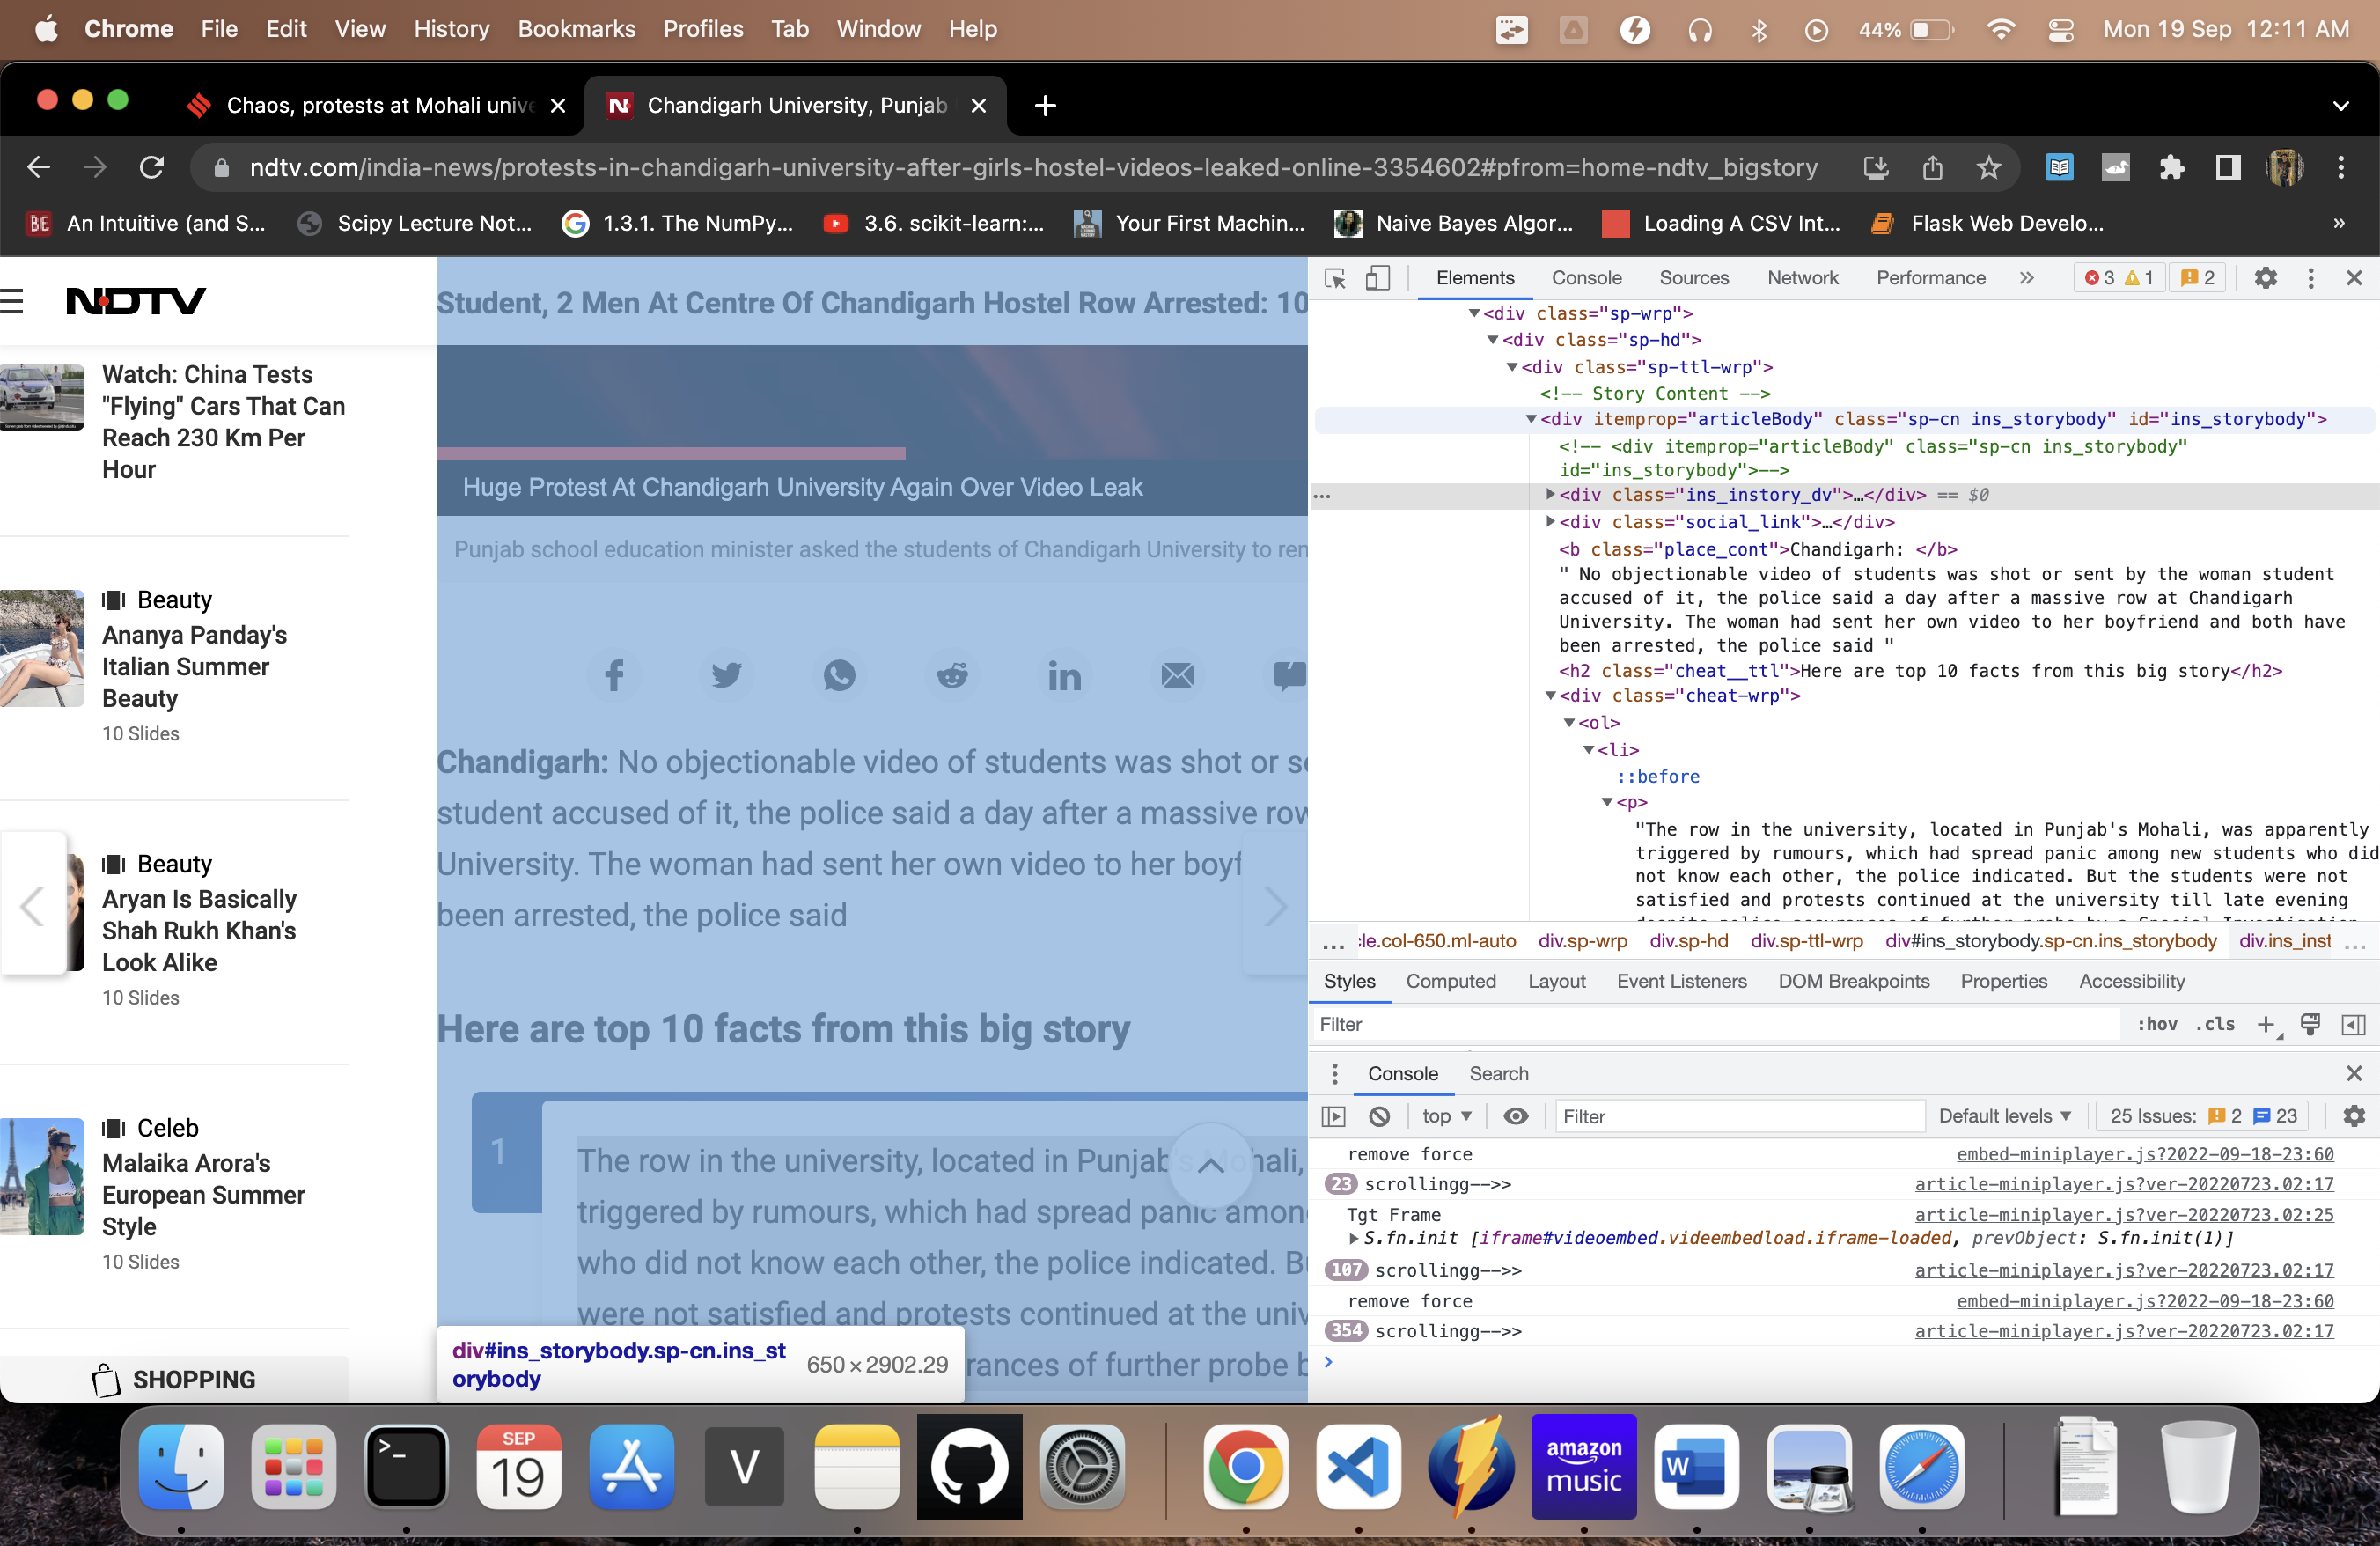

In [ ]:
ar = requests.get(url)
article = BeautifulSoup(ar.text,"lxml")
title = article.find("h1").get_text()
try:
    time = article.find("span", class_="update-data").text
    time = re.sub("Updated:|IST|AM|PM", "", time, flags=re.IGNORECASE).strip()